<a href="https://colab.research.google.com/github/fathanzys/Data/blob/main/0102522024_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Import Library**

###**1.1 Import Library**

In [130]:
# Import library utama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Setting default style
sns.set(style='whitegrid')

###**1.2 Load Dataset**

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
demographic_data = pd.read_csv("/content/drive/MyDrive/DM/uas/demographic.csv", encoding="latin1")
diet_data = pd.read_csv("/content/drive/MyDrive/DM/uas/diet.csv", encoding="latin1")
examination_data = pd.read_csv("/content/drive/MyDrive/DM/uas/examination.csv", encoding="latin1")
labs_data = pd.read_csv("/content/drive/MyDrive/DM/uas/labs.csv", encoding="latin1")
medications_data = pd.read_csv("/content/drive/MyDrive/DM/uas/medications.csv", encoding="latin1")
questionnaire_data = pd.read_csv("/content/drive/MyDrive/DM/uas/questionnaire.csv", encoding="latin1")

###**1.3 5 Data Pertama dari dataset**

In [32]:
print(diet_data.head())
print(demographic_data.head())
print(examination_data.head())

    SEQN         WTDRD1         WTDR2D  DR1DRSTZ  DR1EXMER  DRABF  DRDINT  \
0  73557   16888.327864   12930.890649         1      49.0    2.0     2.0   
1  73558   17932.143865   12684.148869         1      59.0    2.0     2.0   
2  73559   59641.812930   39394.236709         1      49.0    2.0     2.0   
3  73560  142203.069917  125966.366442         1      54.0    2.0     2.0   
4  73561   59052.357033   39004.892993         1      63.0    2.0     2.0   

   DR1DBIH  DR1DAY  DR1LANG  ...  DRD370QQ  DRD370R  DRD370RQ  DRD370S  \
0      6.0     2.0      1.0  ...       NaN      NaN       NaN      NaN   
1      4.0     1.0      1.0  ...       NaN      2.0       NaN      2.0   
2     18.0     6.0      1.0  ...       NaN      NaN       NaN      NaN   
3     21.0     3.0      1.0  ...       NaN      NaN       NaN      NaN   
4     18.0     1.0      1.0  ...       NaN      2.0       NaN      2.0   

   DRD370SQ  DRD370T  DRD370TQ  DRD370U  DRD370UQ  DRD370V  
0       NaN      NaN       NaN 

#**2. Data Preprocessing**

###**2.1. Merge Dataset**

In [33]:
# Gabungkan data diet, demografi, dan pemeriksaan
analysis_data = diet_data.merge(demographic_data, on='SEQN', how='inner')
analysis_data = analysis_data.merge(examination_data, on='SEQN', how='inner')


###**2.2. Feature Selection & Mapping**

In [35]:
features_abbr = [
    'SEQN',
    'DR1TCARB', # Total Karbohidrat
    'DR1TSUGR', # Total Gula
    'BMXBMI'    # Indeks Massa Tubuh
]


feature_name_mapping = {
    'SEQN': 'ID_Responden',
    'DR1TCARB': 'Total_Karbohidrat_(gram)',
    'DR1TSUGR': 'Total_Gula_(gram)',
    'BMXBMI': 'Indeks_Massa_Tubuh'
}

analysis_df = analysis_data[features_abbr].copy()
analysis_df.rename(columns=feature_name_mapping, inplace=True)

###**2.3 Data Cleaning**

In [36]:
analysis_df.dropna(inplace=True)
print("Fitur gizi telah diseleksi, diubah namanya, dan dibersihkan.")
print(f"Jumlah data setelah pembersihan: {len(analysis_df)}")

Fitur gizi telah diseleksi, diubah namanya, dan dibersihkan.
Jumlah data setelah pembersihan: 7989


#**3. EDA**

###**3.1. Pilih fitur yang akan digunakan untuk membentuk cluster**

In [37]:
features_for_clustering = [
    'Total_Karbohidrat_(gram)',
    'Total_Gula_(gram)'
]

X = analysis_df[features_for_clustering]

###**3.2. Standarisasi Fitur dengan StandardScaler**

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering, index=X.index)
print("Data telah diskalakan dan siap untuk proses clustering.")

Data telah diskalakan dan siap untuk proses clustering.


#**4. Menentukan Jumlah Cluster Optimal**

###**4.1 Metode Elbow (Inertia)**

In [39]:
inertia_values = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_df)
    inertia_values.append(kmeans.inertia_)

###**4.2. Plot grafik Metode Siku**

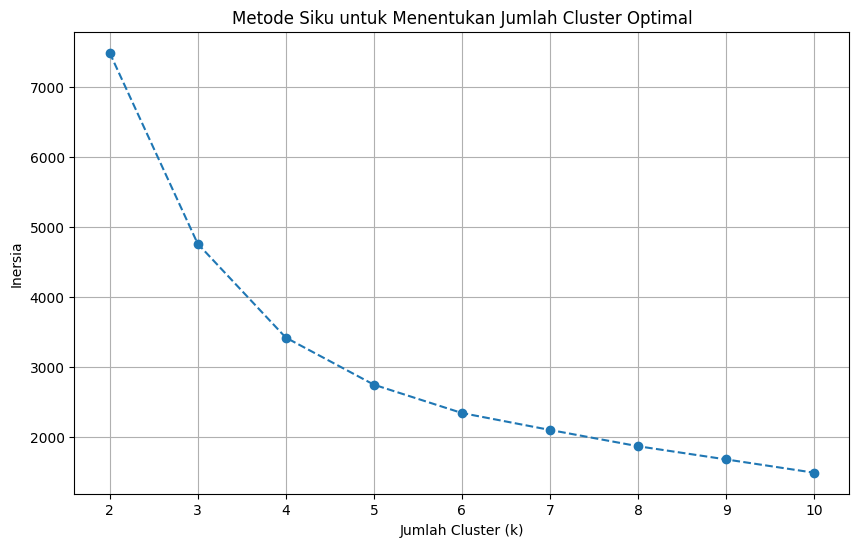

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inersia')
plt.title('Metode Siku untuk Menentukan Jumlah Cluster Optimal')
plt.xticks(k_range)
plt.grid(True)
plt.show()

###4.3 Validasi Silhouette Score**

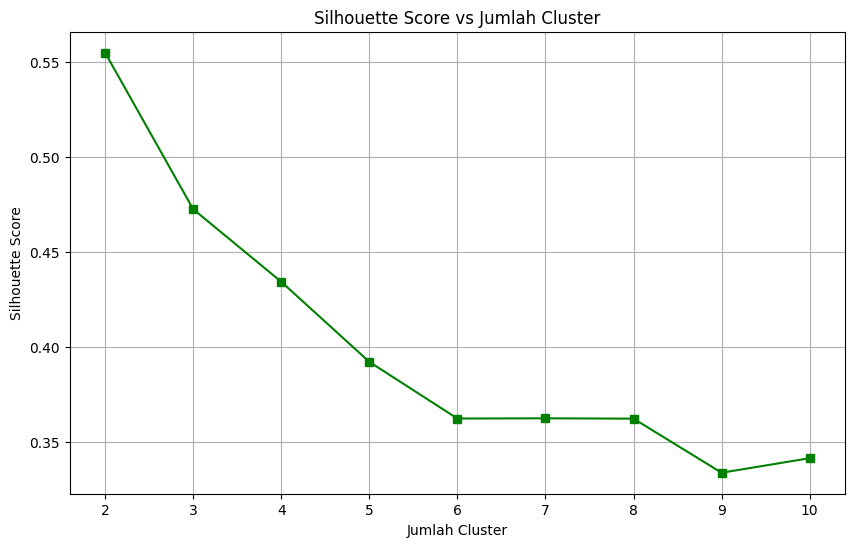

In [41]:
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled_df)
    score = silhouette_score(X_scaled_df, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='s', color='green')
plt.title('Silhouette Score vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

#**5. Modelling**

###**5.1 Inisialisasi dan Latih KMeans**

In [116]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled_df)

In [117]:
analysis_df['Cluster'] = cluster_labels

In [118]:
cluster_counts = analysis_df['Cluster'].value_counts().sort_index()
print("Jumlah data per cluster:")
print(cluster_counts)

Jumlah data per cluster:
Cluster
0    3075
1    4359
2     555
Name: count, dtype: int64


#**6. Visualisasi Hasil Clustering**

###**6.1 Reduksi Dimensi dengan PCA untuk Visualisasi 2D**

In [119]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

###**6.2 Visualisasi Scatter Plot Berdasarkan Hasil Cluster**

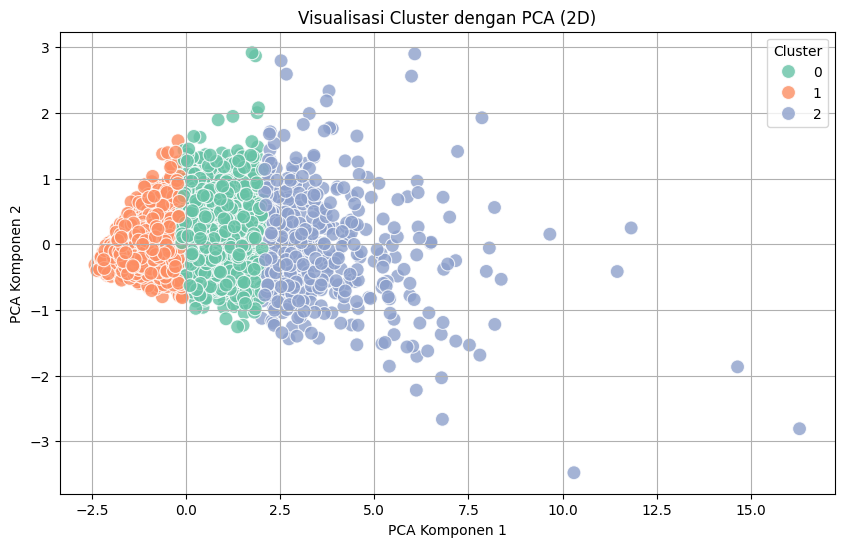

In [120]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=analysis_df['Cluster'],
    palette='Set2', s=100, alpha=0.8
)
plt.title('Visualisasi Cluster dengan PCA (2D)')
plt.xlabel('PCA Komponen 1')
plt.ylabel('PCA Komponen 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [121]:
# Profil rata-rata per cluster
cluster_profile = analysis_df.groupby('Cluster')[['Total_Karbohidrat_(gram)', 'Total_Gula_(gram)', 'Indeks_Massa_Tubuh']].mean()

print("\nProfil Rata-rata per Cluster")
print(cluster_profile)


Profil Rata-rata per Cluster
         Total_Karbohidrat_(gram)  Total_Gula_(gram)  Indeks_Massa_Tubuh
Cluster                                                                 
0                      311.083252         143.020150           25.879220
1                      169.716538          65.355611           25.927759
2                      538.743856         293.693405           26.846667


#**7. Visualiasai PCA**

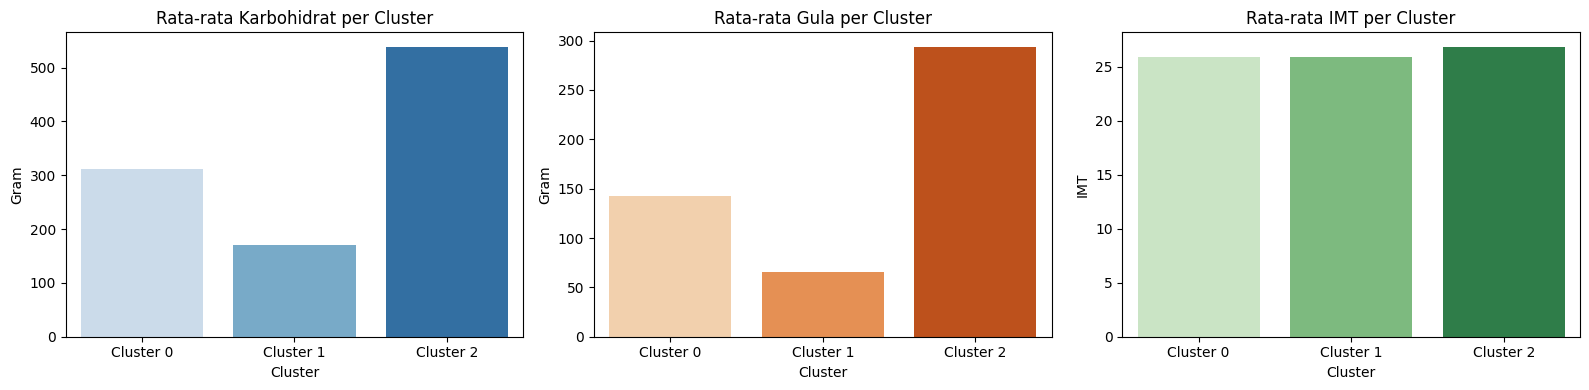

In [122]:
# Ubah index menjadi string untuk label yang lebih rapi
cluster_profile_plot = cluster_profile.copy()
cluster_profile_plot.index = [f'Cluster {i}' for i in cluster_profile_plot.index]

# Visualisasi 1: Rata-rata Karbohidrat per Cluster
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.barplot(data=cluster_profile_plot.reset_index(), x='index', y='Total_Karbohidrat_(gram)', palette='Blues')
plt.title('Rata-rata Karbohidrat per Cluster')
plt.ylabel('Gram')
plt.xlabel('Cluster')

# Visualisasi 2: Rata-rata Gula per Cluster
plt.subplot(1, 3, 2)
sns.barplot(data=cluster_profile_plot.reset_index(), x='index', y='Total_Gula_(gram)', palette='Oranges')
plt.title('Rata-rata Gula per Cluster')
plt.ylabel('Gram')
plt.xlabel('Cluster')

# Visualisasi 3: Rata-rata IMT per Cluster
plt.subplot(1, 3, 3)
sns.barplot(data=cluster_profile_plot.reset_index(), x='index', y='Indeks_Massa_Tubuh', palette='Greens')
plt.title('Rata-rata IMT per Cluster')
plt.ylabel('IMT')
plt.xlabel('Cluster')

plt.tight_layout()
plt.show()

In [123]:
analysis_df['Cluster'] = kmeans.labels_  # atau hasil dari clustering kamu

In [124]:
df_clustered = analysis_df.copy()

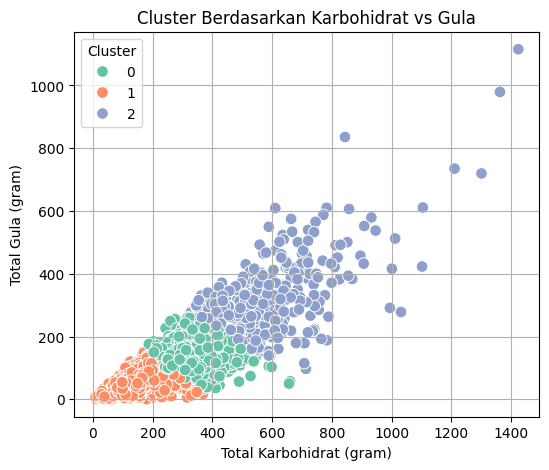

In [125]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df_clustered,
    x='Total_Karbohidrat_(gram)',
    y='Total_Gula_(gram)',
    hue='Cluster',
    palette='Set2',
    s=70
)
plt.title('Cluster Berdasarkan Karbohidrat vs Gula')
plt.xlabel('Total Karbohidrat (gram)')
plt.ylabel('Total Gula (gram)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

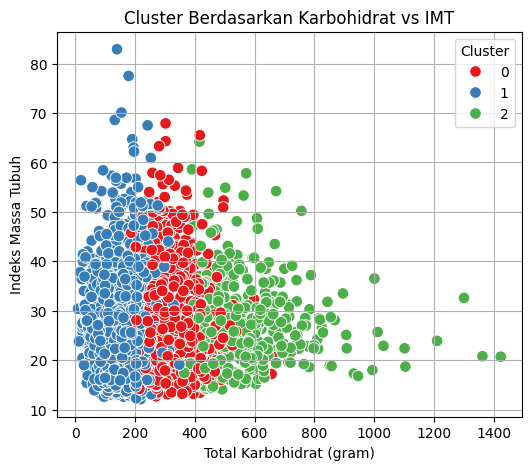

In [126]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df_clustered,
    x='Total_Karbohidrat_(gram)',
    y='Indeks_Massa_Tubuh',
    hue='Cluster',
    palette='Set1',
    s=70
)
plt.title('Cluster Berdasarkan Karbohidrat vs IMT')
plt.xlabel('Total Karbohidrat (gram)')
plt.ylabel('Indeks Massa Tubuh')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

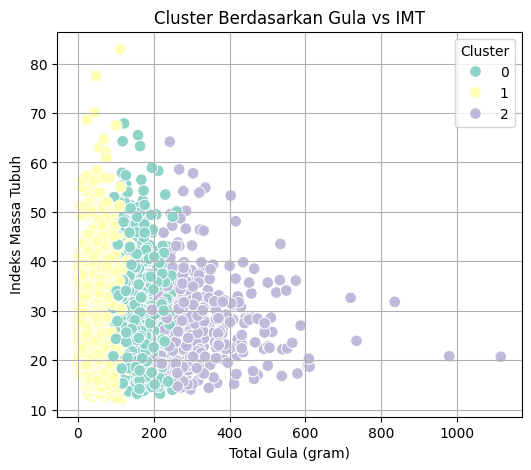

In [127]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df_clustered,
    x='Total_Gula_(gram)',
    y='Indeks_Massa_Tubuh',
    hue='Cluster',
    palette='Set3',
    s=70
)
plt.title('Cluster Berdasarkan Gula vs IMT')
plt.xlabel('Total Gula (gram)')
plt.ylabel('Indeks Massa Tubuh')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

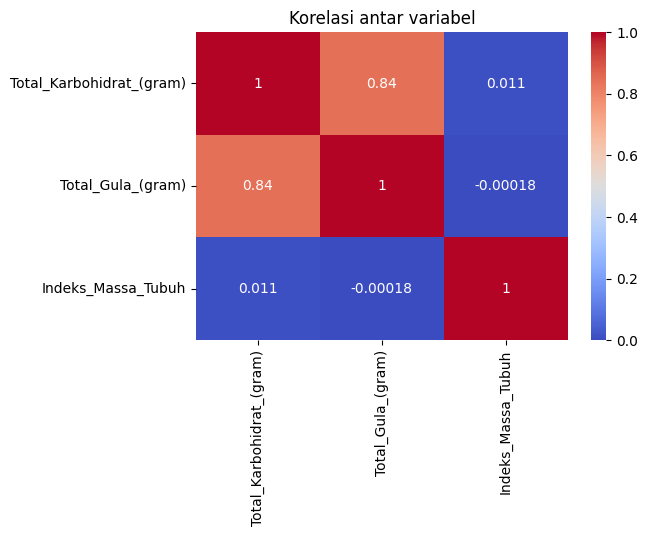

In [128]:
plt.figure(figsize=(6, 4))
sns.heatmap(analysis_df[['Total_Karbohidrat_(gram)', 'Total_Gula_(gram)', 'Indeks_Massa_Tubuh']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar variabel")
plt.show()

In [129]:
from sklearn.metrics import silhouette_score
score = silhouette_score(analysis_df[['Total_Karbohidrat_(gram)', 'Total_Gula_(gram)', 'Indeks_Massa_Tubuh']], analysis_df['Cluster'])
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.463
